## Часть 1. О теореме Байеса

1) Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

#### Решение

Введем следующие события:

$A$ - подсудимый имеет редкую группу крови;

$B$ - подсудимый виновен в убийстве ($\bar{B}$ соответственно, подсудимый невиновен).
 

В условиях задачи необходимо оценить величину $P(B|A)$. По формуле Байеса:
$$P(B|A) = \frac{P(A|B)P(B)}{P(A|B)P(B) + P(A|\bar{B})P(\bar{B})}$$

По условию имеем:

$P(A|B) = 1$;

$P(\bar{B}) = 1 - P(B)$, поскольку $B$ и $\bar{B}$ - полная группа событий;

$P(A|\bar{B}) = 0,01$.

Таким образом:
$$P(B|A) = \frac{P(B)}{P(B) + 0,01(1 - P(B))}$$

Данная вероятность может равняться $0,99$, однако лишь при очень высоком значении априорной вероятности виновности подсудимого, что ставит под сомнение этот довод. Также прокурор мог определить $P(\bar{A}|\bar{B}) = 1 - P(A|\bar{B}) = 0,99$, что является ошибочным утверждением.

2) Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить.


#### Решение

Адвокат определил априорную вероятность вины подсудимого $P(A)=\frac{1}{10000}=0.01$%, которая, вообще говоря, соответствует случайному выбору убийцы из числа жителей города, имеющих редкую группу крови. В реальности, эта цифра должна быть существенно выше, поскольку бОльшая часть жителей города, имеющих редкую группу крови, скорее всего, непричастна к делу, а значит данный выбор априорной вероятности (а значит, и само утверждение) не являются обоснованными.

3) Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


#### Решение

Импортируем нужные библиотеки, напишем функцию для вычисления апостериорных вероятностей и построим требуемые графики:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prior_ill_rate = .01

def compute_posterior(fp, fn, test_is_ill=True, prior_ill_rate=prior_ill_rate):
    if test_is_ill:
        return (1 - fn) * prior_ill_rate / ((1 - fn) * prior_ill_rate + fp * (1 - prior_ill_rate))
    else:
        return fn * prior_ill_rate / (fn * prior_ill_rate + (1 - fp) * (1 - prior_ill_rate))

posterior_ill_rate = np.vectorize(compute_posterior)

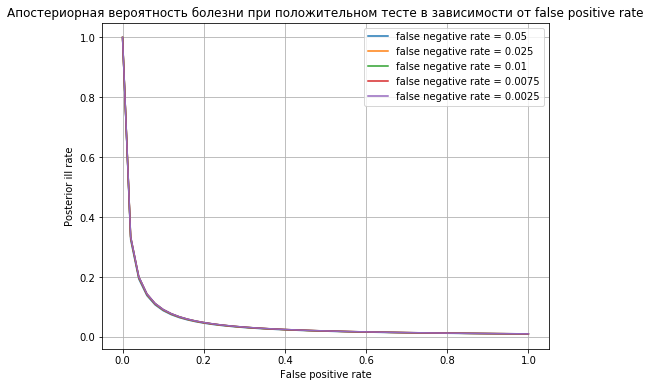

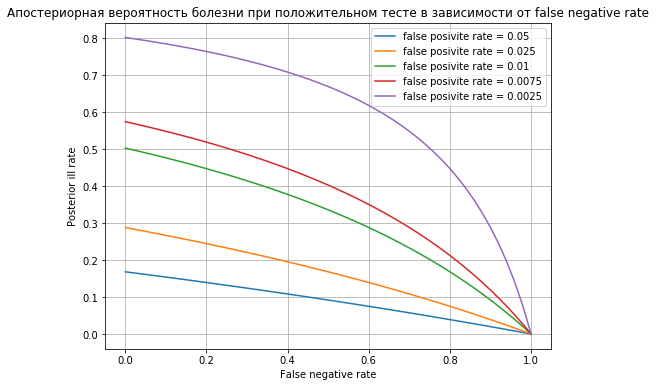

In [3]:
errors = [0.05, 0.025, 0.01, 0.0075, 0.0025]
x = np.linspace(0, 1, 51)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
for fn in errors:
    plt.plot(x, posterior_ill_rate(x, fn), label=f'false negative rate = {fn}')
ax.legend()
plt.title("Апостериорная вероятность болезни при положительном тесте "\
    "в зависимости от false positive rate")
plt.xlabel('False positive rate')
plt.ylabel('Posterior ill rate')
plt.grid(b=True)
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
for fp in errors:
    plt.plot(x, posterior_ill_rate(fp, x), label=f'false posivite rate = {fp}')
ax.legend()
plt.title("Апостериорная вероятность болезни при положительном тесте "\
    "в зависимости от false negative rate")
plt.xlabel('False negative rate')
plt.ylabel('Posterior ill rate')
plt.grid(b=True)
plt.show()

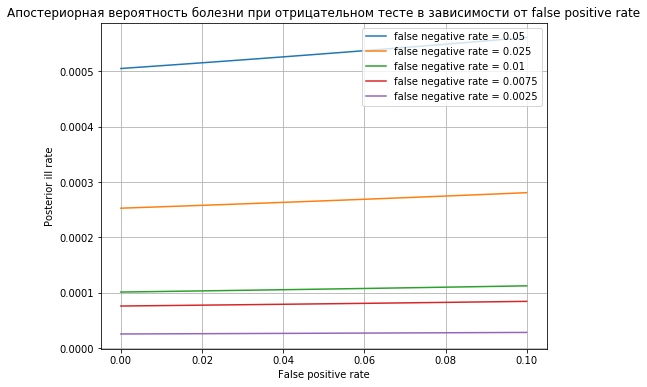

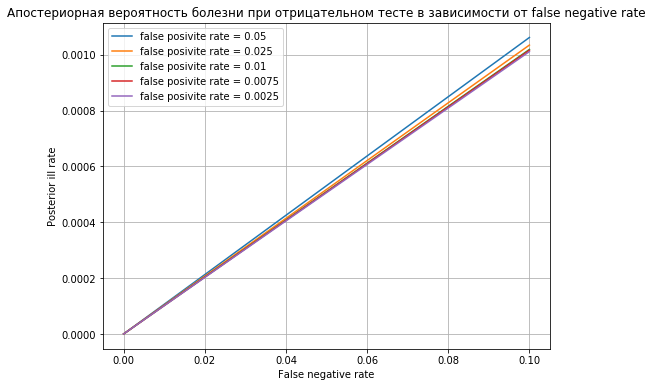

In [4]:
errors = [0.05, 0.025, 0.01, 0.0075, 0.0025]
x = np.linspace(0, 0.1, 51)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
for fn in errors:
    plt.plot(x, posterior_ill_rate(x, fn, test_is_ill=False), label=f'false negative rate = {fn}')
ax.legend()
plt.title("Апостериорная вероятность болезни при отрицательном тесте "\
    "в зависимости от false positive rate")
plt.xlabel('False positive rate')
plt.ylabel('Posterior ill rate')
plt.grid(b=True)
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
for fp in errors:
    plt.plot(x, posterior_ill_rate(fp, x, test_is_ill=False), label=f'false posivite rate = {fp}')
ax.legend()
plt.title("Апостериорная вероятность болезни при отрицательном тесте "\
    "в зависимости от false negative rate")
plt.xlabel('False negative rate')
plt.ylabel('Posterior ill rate')
plt.grid(b=True)
plt.show()

#### Вывод

Из построенных графиков видно, что false positive rate сильнее влияет на апостериорную вероятность болезни при положительном тесте, в то время как false negative rate - на апостериорную вероятность болезни при отрицательном тесте.

В предложенных условиях дать рекомендацию медикам довольно непросто. С одной стороны, проведение теста при указанной априорной вероятности болезни кажется не очень логичным (16% в случае положительного теста так или иначе воспринимаются как скорее нет, чем да). В тоже время, стоит учитывать последствия совершения ошибок разных видов. Если отсутствие лечения может приводить к летальным исходах, а лечение болезни требует минимального кратковременного самолечения, то логично пытаться уменьшить false negative rate. Возможна и обратная ситуация, когда лечение болезни (например, вакцинация, ведь неизвестно, какая будет реакция организма) может приводить к огромному количеству побочных эффектов, а болезнь, несмотря на массовость, лечиться пассивно в течение некоторого времени - в этом случае ложные детекции болезни могут быть даже опаснее, и целесообразно пытаться уменьшить false positive rate. Поэтому принимать подобные решения рационально исходя из опасностей и стоимостей каждого вида ошибок.

## Часть 2. Линейная регрессия

1) Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [5]:
import numpy as np
import pandas as pd
import datetime

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные и преобразуем в соответствии с условием задачи:

In [6]:
data = pd.read_csv('covid.csv', usecols=['location', 'date', 'new_cases', 'total_cases'])
# select Russia only
data = data[data.location == 'Russia']

# we start since 03 March
INIT_DATE_POINT = datetime.datetime(2020, 3, 3)

# apply data filter
data.date = data.date.apply(lambda x: pd.to_datetime(x))
data = data[data.date >= INIT_DATE_POINT]
data = data.assign(day_num = lambda x: (x.date - INIT_DATE_POINT).dt.days + 1)
data.drop(['location'], axis=1, inplace=True)
data.head()

,date,total_cases,new_cases,day_num
49539,2020-03-03,3.0,0.0,1
49540,2020-03-04,3.0,0.0,2
49541,2020-03-05,4.0,1.0,3
49542,2020-03-06,13.0,9.0,4
49543,2020-03-07,13.0,0.0,5


In [7]:
TRAIN_DATASET_SIZE = 50
train = data[data.day_num <= TRAIN_DATASET_SIZE].copy()
train.new_cases = np.where(train.new_cases > 0.0, train.new_cases, 1.0)
train.head()

,date,total_cases,new_cases,day_num
49539,2020-03-03,3.0,1.0,1
49540,2020-03-04,3.0,1.0,2
49541,2020-03-05,4.0,1.0,3
49542,2020-03-06,13.0,9.0,4
49543,2020-03-07,13.0,1.0,5


2) Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

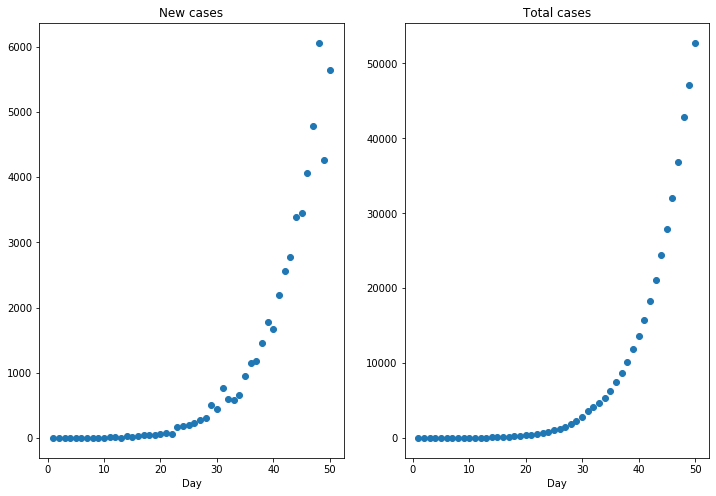

In [8]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 2, 1)
plt.scatter(train.day_num, train.new_cases)
plt.title('New cases')
plt.xlabel('Day')

ax = plt.subplot(1, 2 ,2)
plt.scatter(train.day_num, train.total_cases)
plt.title('Total cases')
plt.xlabel('Day')

plt.show()

2a) Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.


In [9]:
days = train.day_num.to_numpy().reshape(-1, 1)
log_new_cases = np.log(train.new_cases.to_numpy())
log_total_cases = np.log(train.total_cases.to_numpy())

In [10]:
total_cases_lm = LinearRegression()
total_cases_lm.fit(days, log_total_cases)

new_cases_lm = LinearRegression()
new_cases_lm.fit(days, log_new_cases)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Теперь добавим прогнозы на график

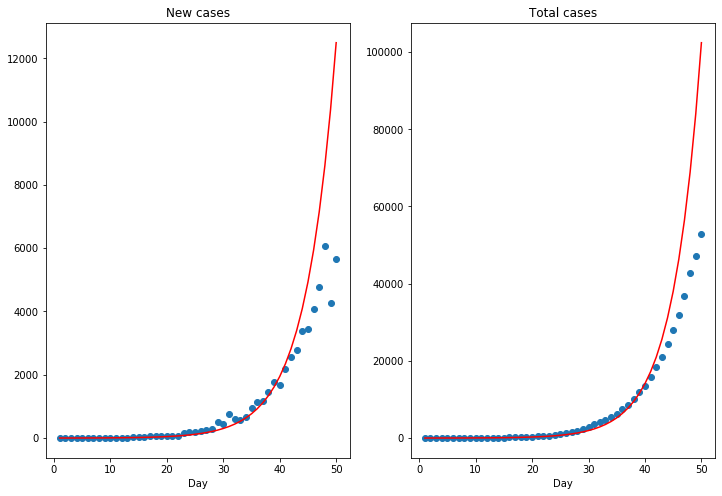

In [11]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 2, 1)
plt.scatter(train.day_num, train.new_cases)
plt.plot(train.day_num, np.exp(new_cases_lm.predict(days)), color='r')
plt.title('New cases')
plt.xlabel('Day')

ax = plt.subplot(1, 2 ,2)
plt.scatter(train.day_num, train.total_cases)
plt.plot(train.day_num, np.exp(total_cases_lm.predict(days)), color='r')
plt.title('Total cases')
plt.xlabel('Day')

plt.show()

Видно, что уже к концу прогнозируемого периода (то есть в рамках имеющихся точек, не говоря уже про экстраполяцию) наблюдается существенное расхождение.

2b) Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

Возьмем функцию для обновления параметров (немного обновив инициализацию x_matrix для дальнейшей работы):

In [12]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[x ** i for i in range(mu.shape[0])]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

В качестве априорного распределения параметров моделей (в данном случае, двух - линейного коэффициента и свободного члена в степени экспоненты) выберем двумерное нормальное распределение с нулевым вектором средних и диагональной матрицей ковариации. Дисперсию маргинальных компонент положим равно пяти для обеспечения широты данного распределения. 

Дисперсию шума оценим исходя из данных и максимальной апостериорной модели:

In [13]:
new_mu = np.zeros(2)
new_sigma = 5 * np.eye(2)
new_sigma_noise = np.std(new_cases_lm.predict(days) - log_new_cases)

total_mu = np.zeros(2)
total_sigma = 5 * np.eye(2)
total_sigma_noise = np.std(total_cases_lm.predict(days) - log_total_cases)

Обновим значения используя данные:

In [14]:
for x, y in enumerate(log_new_cases):
    new_mu, new_sigma = bayesian_update(new_mu, new_sigma, x + 1, y, new_sigma_noise)

for x, y in enumerate(log_total_cases):
    total_mu, total_sigma = bayesian_update(total_mu, total_sigma, x + 1, y, total_sigma_noise)

Полученные вектора средних new_mu, total_mu и соответствующие им ковариационные матрицы определяют апостериорные распределения искомых параметров.

2с) Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

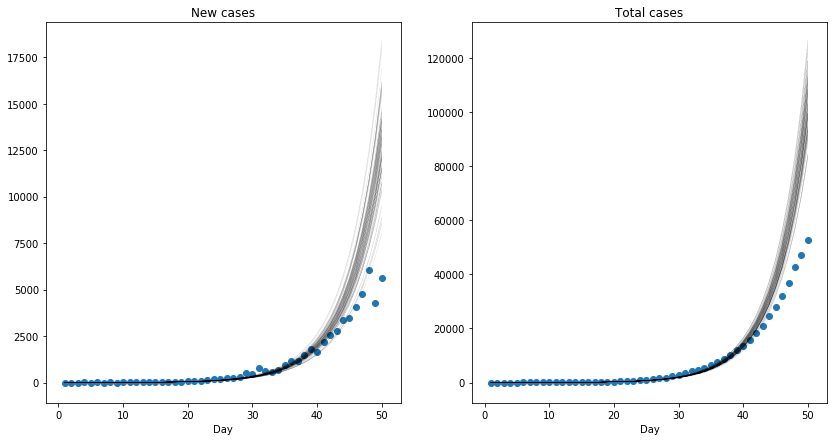

In [15]:
n_samples = 100
plt.figure(figsize=(14, 7))
ax = plt.subplot(1, 2, 1)

new_sampled_weights = np.random.multivariate_normal(new_mu, new_sigma, n_samples)
for w in new_sampled_weights:
    plt.plot(train.day_num, np.exp(w[0] + w[1]*train.day_num), 'k-', lw=.05)
plt.scatter(train.day_num, train.new_cases)
plt.title('New cases')
plt.xlabel('Day')

ax = plt.subplot(1, 2, 2)
total_sampled_weights = np.random.multivariate_normal(total_mu, total_sigma, n_samples)
for w in total_sampled_weights:
    plt.plot(train.day_num, np.exp(w[0] + w[1]*train.day_num), 'k-', lw=.05)
plt.scatter(train.day_num, train.total_cases)
plt.title('Total cases')
plt.xlabel('Day')

plt.show()

Напишем функцию, которая эмпирически строит предсказательное распределение, а также возвращает его медианное значение как прогноз на заданную дату:

In [16]:
def build_predictive_dist(date, mu, sigma, n_samples=10000):
    INIT_DATE_POINT = datetime.datetime(2020, 3, 3)
    date = (date - INIT_DATE_POINT).days + 1
    
    weights = np.random.multivariate_normal(mu, sigma, n_samples)
    pred = np.exp(weights[:,0] + weights[:, 1] * date)
    plt.hist(pred, bins=50)
    return np.median(pred)

Получим соответствующие прогнозы на требуемые дни, и сравним их с реальными данными (слева - предиктивное распределение на общее число, справо - новых случаев):

1th May
Predicted total cases:  746030.0
Real total cases:  114431.0
Predicted new cases:  79956.0
Real new cases:  7933.0


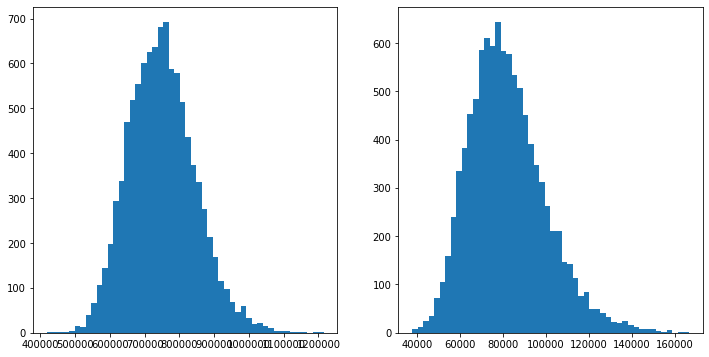

In [17]:
day = datetime.datetime(2020, 5, 1)

plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
real_total_cases = data[data.date == day]['total_cases'].to_numpy()[0]
pred_total_cases = build_predictive_dist(day, total_mu, total_sigma)

ax = plt.subplot(1, 2, 2)
real_new_cases = data[data.date == day]['new_cases'].to_numpy()[0]
pred_new_cases = build_predictive_dist(day, new_mu, new_sigma)

print('1th May')
print('Predicted total cases: ', round(pred_total_cases))
print('Real total cases: ', round(real_total_cases))

print('Predicted new cases: ', round(pred_new_cases))
print('Real new cases: ', round(real_new_cases))

1th June
Predicted total cases:  350510745.0
Real total cases:  414328.0
Predicted new cases:  25774706.0
Real new cases:  8485.0


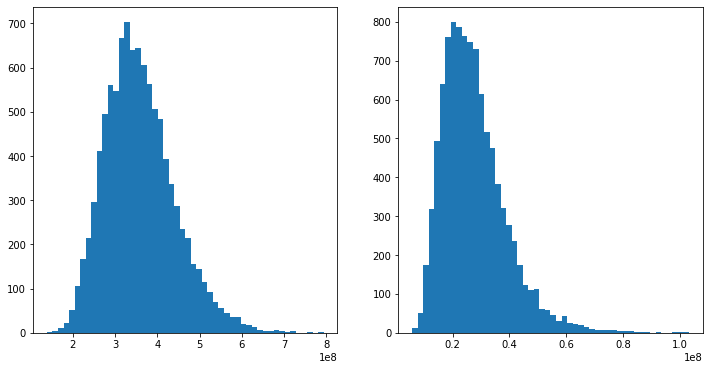

In [18]:
day = datetime.datetime(2020, 6, 1)

plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
real_total_cases = data[data.date == day]['total_cases'].to_numpy()[0]
pred_total_cases = build_predictive_dist(day, total_mu, total_sigma)

ax = plt.subplot(1, 2, 2)
real_new_cases = data[data.date == day]['new_cases'].to_numpy()[0]
pred_new_cases = build_predictive_dist(day, new_mu, new_sigma)

print('1th June')
print('Predicted total cases: ', round(pred_total_cases))
print('Real total cases: ', round(real_total_cases))

print('Predicted new cases: ', round(pred_new_cases))
print('Real new cases: ', round(real_new_cases))

1th September
Predicted total cases:  2.9336123645747816e+16
Real total cases:  997072.0
Predicted new cases:  688591063190855.0
Real new cases:  4670.0


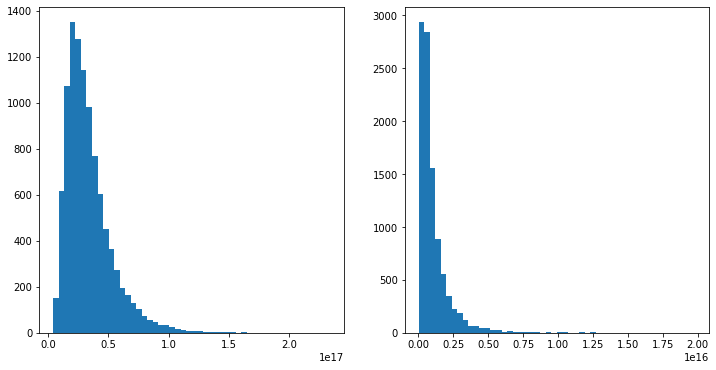

In [19]:
day = datetime.datetime(2020, 9, 1)

plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
real_total_cases = data[data.date == day]['total_cases'].to_numpy()[0]
pred_total_cases = build_predictive_dist(day, total_mu, total_sigma)

ax = plt.subplot(1, 2, 2)
real_new_cases = data[data.date == day]['new_cases'].to_numpy()[0]
pred_new_cases = build_predictive_dist(day, new_mu, new_sigma)

print('1th September')
print('Predicted total cases: ', round(pred_total_cases))
print('Real total cases: ', round(real_total_cases))

print('Predicted new cases: ', round(pred_new_cases))
print('Real new cases: ', round(real_new_cases))

Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана.


Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.


3a) Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

Учитывая, что число новых случаев в каком-то смысле является плотностью функции общего числа случаев, обучим сначала число новых случаев следующим образом:
$$ new\_cases = exp(w_0 + w_1 * x + w_2 * x^2), $$
и затем будем вычислять общее число случаев кумулятивно используя полученное выражение.

3b) Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [20]:
sigmoid_new_cases_lm = LinearRegression()
sigmoid_new_cases_lm.fit(np.hstack([days, days**2]), log_new_cases)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

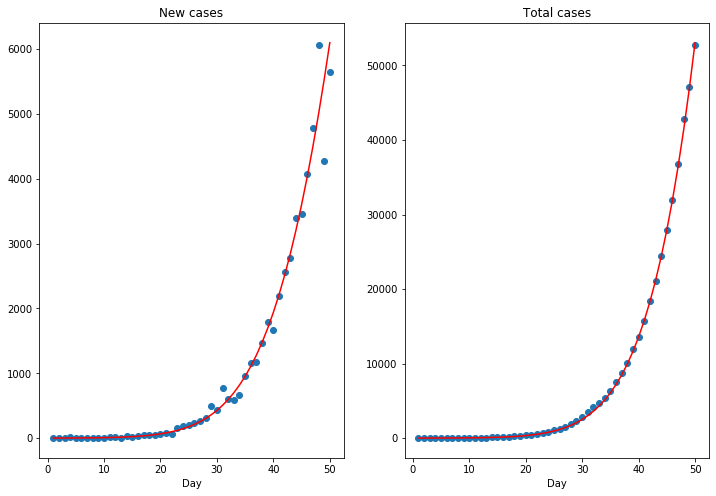

In [21]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 2, 1)
plt.scatter(train.day_num, train.new_cases)
plt.plot(train.day_num, np.exp(sigmoid_new_cases_lm.predict(np.hstack([days, days**2]))), color='r')
plt.title('New cases')
plt.xlabel('Day')

ax = plt.subplot(1, 2 ,2)
plt.scatter(train.day_num, train.total_cases)
plt.plot(train.day_num, np.cumsum(np.exp(sigmoid_new_cases_lm.predict(np.hstack([days, days**2])))), color='r')
plt.title('Total cases')
plt.xlabel('Day')

plt.show()

Кажется, кривая проходит значительно лучше. Попробуем также нанести на график точки, которые были после, и заглянуть вперед ...

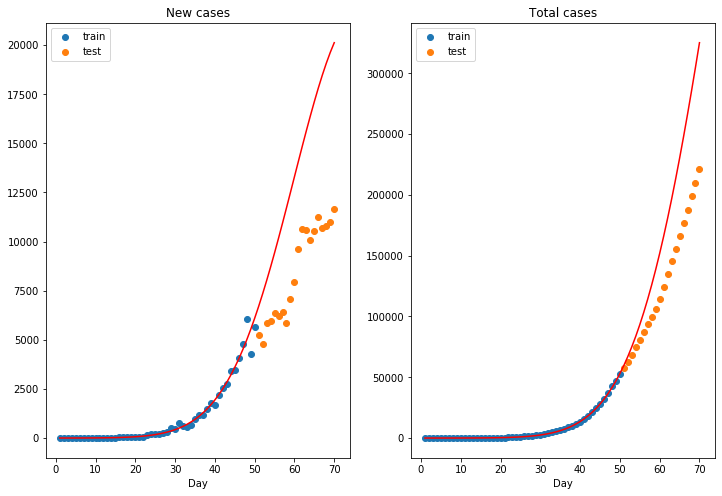

In [22]:
DEMO_TEST_SIZE = 20

X = np.arange(1, TRAIN_DATASET_SIZE + DEMO_TEST_SIZE + 1)
X = np.vstack([X, X ** 2]).swapaxes(0, 1)

plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 2, 1)
plt.scatter(data.day_num[:TRAIN_DATASET_SIZE],data.new_cases[:TRAIN_DATASET_SIZE], label='train')
plt.scatter(data.day_num[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE],
            data.new_cases[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE], label='test')
plt.plot(data.day_num[:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE], np.exp(sigmoid_new_cases_lm.predict(X)), color='r')
plt.title('New cases')
plt.xlabel('Day')
plt.legend()

ax = plt.subplot(1, 2 ,2)
plt.scatter(data.day_num[:TRAIN_DATASET_SIZE],data.total_cases[:TRAIN_DATASET_SIZE], label='train')
plt.scatter(data.day_num[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE],
            data.total_cases[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE], label='test')
plt.plot(data.day_num[:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE], np.cumsum(np.exp(sigmoid_new_cases_lm.predict(X))), color='r')
plt.title('Total cases')
plt.xlabel('Day')
plt.legend()

plt.show()

Но тем не менее, если отойти немного от графика, уже начинаются расхождения (на самом деле, можно немного менять размер train датасета, и наблюдать, как сильно следующие 5-15 точек будут влиять на характер кривой).

Продемонстрируем на случае размера train равного 55:

In [23]:
TRAIN_DATASET_SIZE = 55
pseudo_train = data[data.day_num <= TRAIN_DATASET_SIZE].copy()
pseudo_train.new_cases = np.where(pseudo_train.new_cases > 0.0, pseudo_train.new_cases, 1.0)

days = pseudo_train.day_num.to_numpy().reshape(-1, 1)
log_new_cases = np.log(pseudo_train.new_cases.to_numpy())

sigmoid_new_cases_lm = LinearRegression()
sigmoid_new_cases_lm.fit(np.hstack([days, days**2]), log_new_cases)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

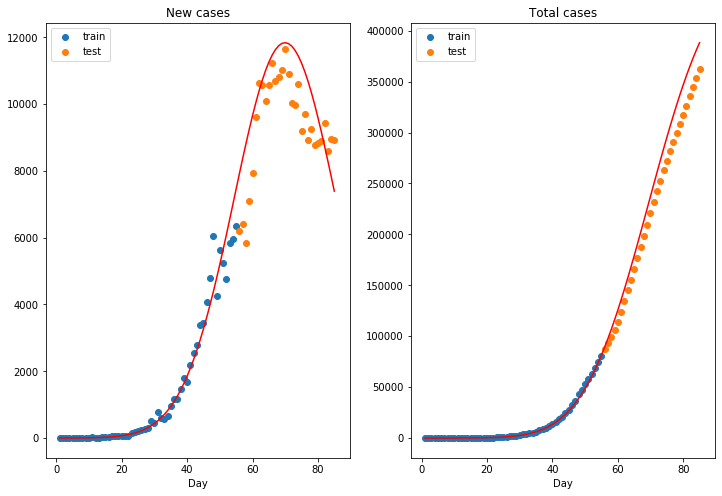

In [24]:
DEMO_TEST_SIZE = 30

X = np.arange(1, TRAIN_DATASET_SIZE + DEMO_TEST_SIZE + 1)
X = np.vstack([X, X ** 2]).swapaxes(0, 1)

plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 2, 1)
plt.scatter(data.day_num[:TRAIN_DATASET_SIZE],data.new_cases[:TRAIN_DATASET_SIZE], label='train')
plt.scatter(data.day_num[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE],
            data.new_cases[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE], label='test')
plt.plot(data.day_num[:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE], np.exp(sigmoid_new_cases_lm.predict(X)), color='r')
plt.title('New cases')
plt.xlabel('Day')
plt.legend()

ax = plt.subplot(1, 2 ,2)
plt.scatter(data.day_num[:TRAIN_DATASET_SIZE],data.total_cases[:TRAIN_DATASET_SIZE], label='train')
plt.scatter(data.day_num[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE],
            data.total_cases[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE], label='test')
plt.plot(data.day_num[:TRAIN_DATASET_SIZE + DEMO_TEST_SIZE], np.cumsum(np.exp(sigmoid_new_cases_lm.predict(X))), color='r')
plt.title('Total cases')
plt.xlabel('Day')
plt.legend()

plt.show()

Как видно, здесь нам повезло сильнее, и график даже на бОльший период вперед выглядит значительно точнее. Таким образом, сигмоида подходит значительно лучше чистой экспоненты, одна и у нее хватает проблем.

3b) Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

Здесь все делаем аналогично тому что было ранее. Вернем параметры тренировки к исходным и обновим регрессию.

In [25]:
# REVERSE CHANGES BACK
TRAIN_DATASET_SIZE = 50
days = train.day_num.to_numpy().reshape(-1, 1)
log_new_cases = np.log(train.new_cases.to_numpy())

sigmoid_new_cases_lm = LinearRegression()
sigmoid_new_cases_lm.fit(np.hstack([days, days**2]), log_new_cases)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Возьмем те же априорные параметры, что и ранее:

In [26]:
new_mu = np.zeros(3)
new_sigma = 5 * np.eye(3)
new_sigma_noise = np.std(sigmoid_new_cases_lm.predict(np.hstack([days, days**2])) - log_new_cases)

Получим апостериорные значения параметров:

In [27]:
for x, y in enumerate(log_new_cases):
    new_mu, new_sigma = bayesian_update(new_mu, new_sigma, x + 1, y, new_sigma_noise)

3c) Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


Посэмплируем сигмоиды из полученного выше апостериорного распределения параметров:

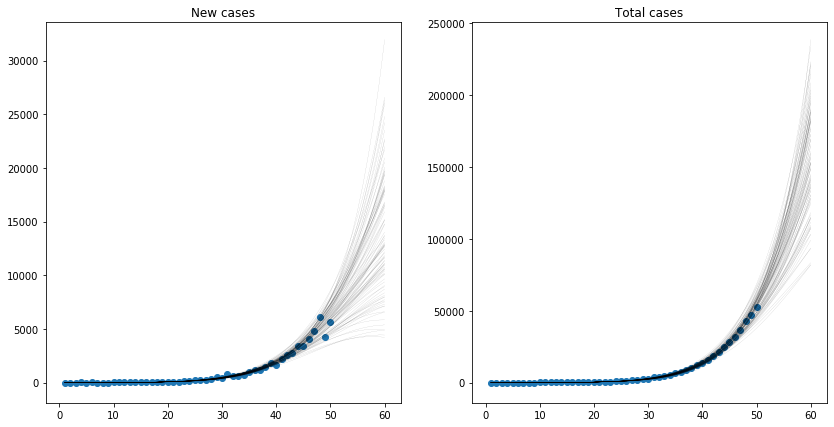

In [28]:
new_sampled_weights = np.random.multivariate_normal(new_mu, new_sigma, n_samples)

plt.figure(figsize=(14, 7))
ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)
for w in new_sampled_weights:
    new_for_w =  np.exp(w[0] + w[1] * data.day_num[:60] + w[2] * data.day_num[:60] ** 2)
    ttl_for_w = np.cumsum(new_for_w)
    ax0.plot(data.day_num[:60], new_for_w, 'k-', lw=.05)
    ax1.plot(data.day_num[:60], ttl_for_w, 'k-', lw=.05)
ax0.scatter(train.day_num, train.new_cases)
ax1.scatter(train.day_num, train.total_cases)
ax0.title.set_text('New cases')
ax1.title.set_text('Total cases')

Построим функцию для поcтроения предсказательного распределения на основе сэмплирования из апостериорного распределения: 

In [29]:
def build_predictive_dist_for_sigm_model(date, mu, sigma, n_samples=5000):
    INIT_DATE_POINT = datetime.datetime(2020, 3, 3)
    date = (date - INIT_DATE_POINT).days + 1
    
    x0 = np.ones(date)
    x1 = np.arange(1, date + 1)
    x2 = x1.copy() ** 2
    X = np.transpose(np.vstack([x0, x1, x2]))
    del x0, x1, x2

    all_cases_pred = []
    weights = np.random.multivariate_normal(mu, sigma, n_samples)
    for w in weights:
        new_up_to_date = np.exp(X @ w)
        all_cases_pred.append(np.sum(new_up_to_date))
    return np.array(all_cases_pred)

Построим графики этого распределения и получим оценки, в качестве примера, на 01 июня и 01 сентября 2020 года:

1th June
Оптимистичный прогноз (10% персентиль):  308980.06406655826
Пессимистичный прогноз (90% персентиль):  2268685.7995067993
Истинное значение на дату:  414328.0


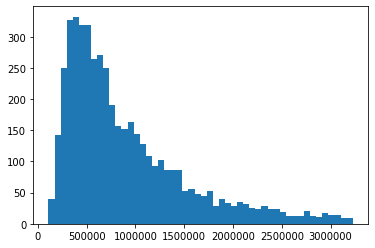

In [30]:
day = datetime.datetime(2020, 6, 1)

real_total_cases = data[data.date == day]['total_cases'].to_numpy()[0]
total_cases_pred = build_predictive_dist_for_sigm_model(day, new_mu, new_sigma)
print('1th June')
print('Оптимистичный прогноз (10% персентиль): ', np.quantile(total_cases_pred, 0.1))
print('Пессимистичный прогноз (90% персентиль): ', np.quantile(total_cases_pred, 0.9))
print('Истинное значение на дату: ', real_total_cases)

# cut tails to display
total_cases_pred = total_cases_pred[total_cases_pred < np.percentile(total_cases_pred, 95)]
plt.hist(total_cases_pred, bins=50);

1th September
Оптимистичный прогноз (10% персентиль):  329250.0996409477
Пессимистичный прогноз (90% персентиль):  5271094.94199711
Истинное значение на дату:  997072.0


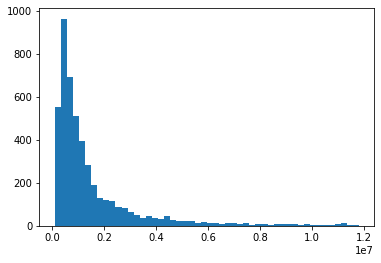

In [31]:
day = datetime.datetime(2020, 9, 1)

real_total_cases = data[data.date == day]['total_cases'].to_numpy()[0]
total_cases_pred = build_predictive_dist_for_sigm_model(day, new_mu, new_sigma)
print('1th September')
print('Оптимистичный прогноз (10% персентиль): ', np.quantile(total_cases_pred, 0.1))
print('Пессимистичный прогноз (90% персентиль): ', np.quantile(total_cases_pred, 0.9))
print('Истинное значение на дату: ', real_total_cases)

# cut tails to display
total_cases_pred = total_cases_pred[total_cases_pred < np.percentile(total_cases_pred, 95)]
plt.hist(total_cases_pred, bins=50);

Даже несмотря на то, что обучение получилось далеким от качественного, время показало, что полученные прогнозы были весьма приемлемы.

#### Выводы

- Модель, основанная на сигмоиде, ожидаемо показала лучшие результаты, в сравнении с экспоненциальной моделью. В то же время, ее также нельзя называть идеальной. Небольшое увеличение размера датасета даже визуально показало лучший результат, что вкупе со спорным качеством входных данных может являться причиной малокачественных прогнозов;

- Результаты, предсказанные сигмоидальной моделью, в целом позволяли оценить реальные значения искомых величин на сравнительно большой период, что положительно сказывается на возможности применения модели;

- Используя сходство полученной кривой с вероятностной моделью, можно пытаться оценивать тенденции распространения болезни используя вероятностную аналогию. Для этого можно проводить нормировку полученного распределения, а затем вычислять значение функции распределения (для нормированного числа общих случаев). Используя эту информацию, можно косвенно оценить потенциальное время выхода "на плато" и использовать эти данные для принятия решения о введении, например, карантина.